# Library Preparation

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive 
drive.mount('/drive')
import os

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# Dataset Preparation

In [2]:
path = '/drive/MyDrive/Colab/Project/smlt/' # Define custom base path
data = pd.read_csv(path+'BearingVibration_Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  982 non-null    object 
 1   Bearing 1   982 non-null    float64
 2   Bearing 2   982 non-null    float64
 3   Bearing 3   982 non-null    float64
 4   Bearing 4   982 non-null    float64
dtypes: float64(4), object(1)
memory usage: 38.5+ KB


In [3]:
data.head()

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [4]:
data.tail()

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
977,2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
978,2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
979,2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
980,2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786
981,2004-02-19 06:22:39,0.001168,0.000767,0.000716,0.001699


In [5]:
data.describe(include='all')

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,982,982.000000,982.000000,982.000000,982.000000
unique,982,NaN,NaN,NaN,NaN
top,2004-02-17 14:02:39,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,0.080951,0.078543,0.081351,0.047830
std,NaN,0.040200,0.011789,0.011607,0.009549
min,NaN,0.001168,0.000767,0.000716,0.001699
25%,NaN,0.060773,0.074240,0.076829,0.043951
50%,NaN,0.062021,0.075206,0.078187,0.044524
75%,NaN,0.083277,0.077458,0.080575,0.048130


# Preprocessing  

Cleaning dataset and then visualize it.


In [6]:
data.rename({'Unnamed: 0':'Timestamp'}, axis=1, inplace=True)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  982 non-null    datetime64[ns]
 1   Bearing 1  982 non-null    float64       
 2   Bearing 2  982 non-null    float64       
 3   Bearing 3  982 non-null    float64       
 4   Bearing 4  982 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 38.5 KB


<class 'int'>
<class 'int'>


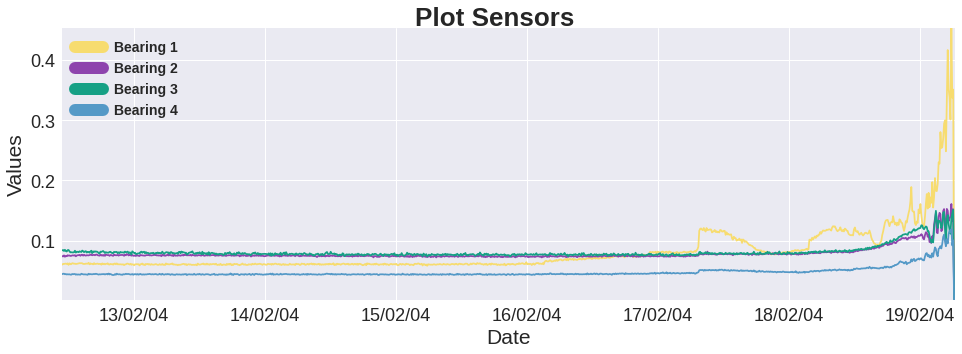

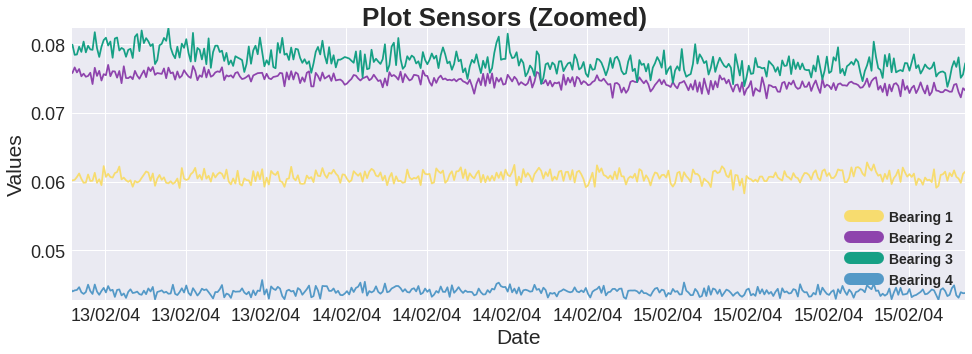

In [7]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

plt.style.use('seaborn')

def plot_sensor(title, n_sample=None, bottom_n=0):
  if n_sample == None:
    n_sample = int((data.shape[0]-1)*1) #500
  print(type(n_sample))
  plt.figure(figsize=(16,5)) 
  plt.plot(data['Timestamp'], data['Bearing 1'], color='#F7DC6F', label='Bearing 1')
  plt.plot(data['Timestamp'], data['Bearing 2'], color='#8E44AD', label='Bearing 2')
  plt.plot(data['Timestamp'], data['Bearing 3'], color='#16A085', label='Bearing 3')
  plt.plot(data['Timestamp'], data['Bearing 4'], color='#5499C7', label='Bearing 4')

  plt.tick_params(axis='y', labelsize=18)
  plt.tick_params(axis='x', labelsize=18)
  plt.ylabel('Values', fontsize=21)
  plt.xlabel('Date', fontsize=21)
  plt.xlim(data.iloc[bottom_n]['Timestamp'], data.iloc[n_sample]['Timestamp'])
  plt.ylim(min(data[data.columns[1:]][bottom_n:n_sample].min()), 
           max(data[data.columns[1:]][bottom_n:n_sample].max()))
  date_form = DateFormatter("%d/%m/%y")
  plt.gca().xaxis.set_major_formatter(date_form)
  plt.suptitle(title, fontsize=26, y=.94, fontweight='heavy')#, x=mid)
  leg = plt.legend(
                  loc='best', ncol=1,
                  prop={'size':14, 'weight':'bold'})
  for i in range(4):
    leg.get_lines()[i].set_linewidth(12)

plot_sensor('Plot Sensors')
plot_sensor('Plot Sensors (Zoomed)', 500, 100)

In [8]:
# Check the statistics of the cleaned data
data.describe(percentiles=[.005,.01,.25,.5,.75,.8,.99,.995], datetime_is_numeric=True)

,Timestamp,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,982,982.000000,982.000000,982.000000,982.000000
mean,2004-02-15 20:37:39.000000512,0.080951,0.078543,0.081351,0.047830
min,2004-02-12 10:52:39,0.001168,0.000767,0.000716,0.001699
0.5%,2004-02-12 11:41:42,0.059057,0.072282,0.074176,0.042872
1%,2004-02-12 12:30:45,0.059238,0.072593,0.074519,0.042944
25%,2004-02-14 03:45:09,0.060773,0.074240,0.076829,0.043951
50%,2004-02-15 20:37:39,0.062021,0.075206,0.078187,0.044524
75%,2004-02-17 13:30:09,0.083277,0.077458,0.080575,0.048130
80%,2004-02-17 21:40:39,0.100057,0.078098,0.081357,0.050032
99%,2004-02-19 04:44:33,0.283027,0.139638,0.132993,0.095108


# Mining Process

The idea behind this approach adopted from proposed framework [here](https://doi.org/10.1007/978-981-16-7334-4_8), but simpler and customable according to the given dataset. First step is to **discretize** the value of each sensor which indicates the sensor is in normal or failure condition. Then the results are **clustered** to find out the condition of the machine, so that in the end a **pattern** can be obtained to give early warning when the machine experiences signs of failure.

## Functions

In [9]:
def raw(x):
  '''
  Feature Map for Feature Engineering. Discretize numeric data
  from sensor to 0(Normal) or 1(failure) with IQR approach.
  '''
  q1 = x.quantile(.25)
  q3 = x.quantile(.75)
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  x_raw = x.copy()  
  return x_raw.apply(lambda x: 1 if x<lower_bound or x>upper_bound else 0)

def get_pattern(raw_features):
  '''
  Function to get rule pattern
  '''
  pattern_binary = ''   
  pattern_readable = ''
  for i in range(1,5):
    if raw_features[i+4]==1:
      pattern_readable += raw_features.keys()[i]+': Failure, '
    else: 
      pattern_readable += raw_features.keys()[i]+': Normal, '
    pattern_binary += str(raw_features[i+4])
  return pattern_binary, pattern_readable[:-2]

## Feature Engineering  

Generate raw fitures from each Bearing sensor.

In [10]:
for col in data.columns[1:]:
  data[col+'_raw'] = raw(data[col])
data.head(3)

,Timestamp,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Bearing 1_raw,Bearing 2_raw,Bearing 3_raw,Bearing 4_raw
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,0,0,0,0
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,0,0,0,0
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,0,0,0,0


In [11]:
data.tail(3)

,Timestamp,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Bearing 1_raw,Bearing 2_raw,Bearing 3_raw,Bearing 4_raw
979,2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817,1,1,1,1
980,2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786,1,1,1,1
981,2004-02-19 06:22:39,0.001168,0.000767,0.000716,0.001699,1,1,1,1


## Clustering

Clustering obtained patterns to get rules that indicate machine failure.

In [12]:
from sklearn.cluster import KMeans

cls = KMeans(n_clusters=2,random_state=42).fit(data[data.columns[5:]])
data['Condition'] = cls.labels_

data['Binary Pattern'], data['Readable Pattern'] = zip(*data.apply(get_pattern, axis=1))

### Alert Rules

In [13]:
import pickle 

rules_model = []
alert_rules = []

for pattern in data[data.Condition==1]['Binary Pattern'].value_counts().keys():
  rules_model.append(pattern)
for pattern in data[data.Condition==1]['Readable Pattern'].value_counts().keys():
  alert_rules.append(pattern+' -> Machine Failure Alert!')

with open(path+'rules_model.pkl', 'wb') as f:
  pickle.dump(rules_model, f, pickle.HIGHEST_PROTOCOL)
with open(path+'alert_rules.pkl', 'wb') as f:
  pickle.dump(alert_rules, f, pickle.HIGHEST_PROTOCOL)

alert_rules

['Bearing 1: Failure, Bearing 2: Failure, Bearing 3: Failure, Bearing 4: Failure -> Machine Failure Alert!',
 'Bearing 1: Normal, Bearing 2: Failure, Bearing 3: Failure, Bearing 4: Failure -> Machine Failure Alert!',
 'Bearing 1: Normal, Bearing 2: Failure, Bearing 3: Failure, Bearing 4: Normal -> Machine Failure Alert!',
 'Bearing 1: Failure, Bearing 2: Failure, Bearing 3: Normal, Bearing 4: Normal -> Machine Failure Alert!',
 'Bearing 1: Normal, Bearing 2: Failure, Bearing 3: Normal, Bearing 4: Failure -> Machine Failure Alert!']

In [14]:
labeled_data = data.copy()
labeled_data.drop(columns=labeled_data.columns[5:9], inplace=True)
labeled_data.drop(columns=labeled_data.columns[-2:], inplace=True)
labeled_data.Condition.replace({0:'Normal', 1:'Failure'},inplace=True)
labeled_data.to_csv(path+'Labeled Data.csv')
labeled_data.sample(3)

,Timestamp,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Condition
525,2004-02-16 02:22:39,0.062048,0.073398,0.077161,0.044301,Normal
189,2004-02-13 18:22:39,0.061560,0.074947,0.079193,0.044727,Normal
531,2004-02-16 03:22:39,0.066212,0.074822,0.077531,0.044726,Normal


# Results

In [15]:
import matplotlib.patches as mpatches
from datetime import timedelta

qq = labeled_data.copy()
x = qq[qq.columns[0]]

t_n = data.iloc[data.shape[0]-1]['Timestamp']
t_0 = data.iloc[0]['Timestamp']
t_1 = data.iloc[data[data.Condition==1].index[0]]['Timestamp']
interval =  t_n - t_1

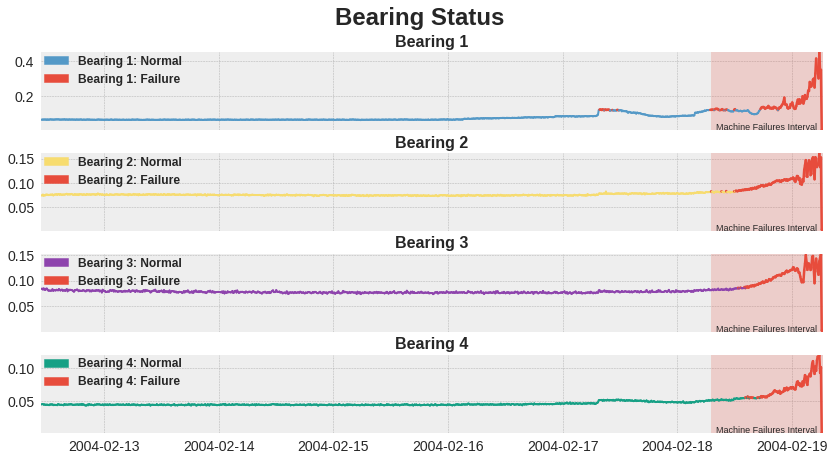

In [16]:
plt.style.use('bmh')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, sharey=False, figsize=(14,7))
list_ax = [ax1, ax2, ax3, ax4]
plt.subplots_adjust(hspace=.3)
plt.suptitle('Bearing Status', fontsize=24, fontweight='bold', y=.97)
my_col = ['#F7DC6F', '#8E44AD', '#16A085', '#5499C7']

for num, ax in enumerate(list_ax):
  y = qq[qq.columns[num+1]]
  z = data[data.columns[num+5]]
  for x1, x2, y1,y2, z1, z2 in zip(x, x[1:], y, y[1:], z, z[1:]):
    if z1 == 1:
      ax.plot([x1, x2], [y1, y2], color='#E74C3C', linewidth=2.5)
    else:
      ax.plot([x1, x2], [y1, y2], color=my_col[num-1], linewidth=2)
  ax.set_title(labeled_data.columns[num+1],fontsize=16,fontweight='heavy')
  ax.annotate(s='Machine Failures Interval', xy=(t_1+timedelta(hours=1),y.min()*.9),
              fontsize=9) 
  rect = mpatches.Rectangle((t_1,-.1),interval,.6, alpha=.2, color='#E74C3C')
                        
  ax.add_patch(rect)
  red_patch = mpatches.Patch(color='#E74C3C', label='{}: Failure'\
                             .format(labeled_data.columns[num+1])) 
  normal_patch = mpatches.Patch(color=my_col[num-1], label='{}: Normal'\
                                .format(labeled_data.columns[num+1]))   
  leg = ax.legend(handles=[normal_patch, red_patch], loc='upper left', 
                  bbox_to_anchor=(-.01,1.1), prop={'size':12, 'weight':'bold'})
  ax.tick_params(axis='both', labelsize=14)
  ax.set_xlim(data.iloc[0]['Timestamp'], data.iloc[data.shape[0]-1]['Timestamp'])
  ax.set_ylim(min(y), max(y))

# plt.show()
plt.savefig(path+'Plot_Labeled_Bearings.png', bbox_inches='tight', dpi=300)
print()

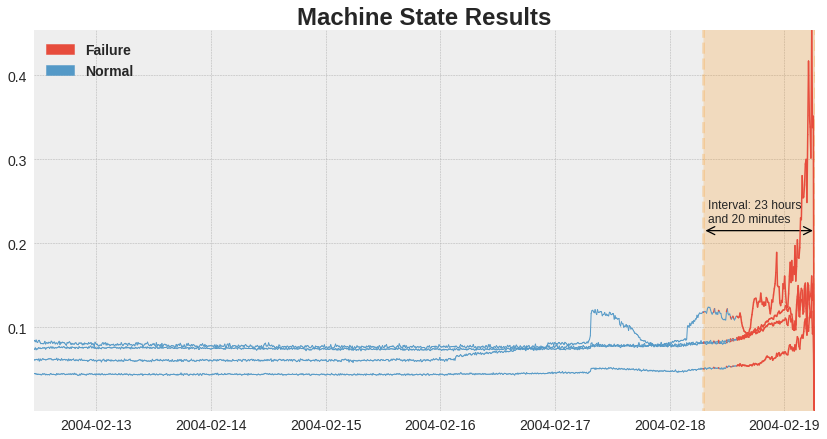

In [19]:
qq = labeled_data.copy()
z = qq[qq.columns[-1]]

fig, ax1 = plt.subplots(figsize=(14,7))
plt.subplots_adjust(hspace=.3)
my_col = ['#F7DC6F', '#8E44AD', '#16A085', '#5499C7']

for num in range(1,5):
  y = qq[qq.columns[num]]
  for x1, x2, y1,y2, z1, z2 in zip(x, x[1:], y, y[1:], z, z[1:]):
    if z1 == 'Failure':
      ax1.plot([x1, x2], [y1, y2], color='#E74C3C', linewidth=1.5)
    else:
      ax1.plot([x1, x2], [y1, y2], color='#5499C7', linewidth=1)

ax1.set_title('Machine State Results',fontsize=24, fontweight='heavy')
list_ax = [ax1]
red_patch = mpatches.Patch(color='#E74C3C', label='Failure')
blue_patch = mpatches.Patch(color='#5499C7', label='Normal') 
rect = mpatches.Rectangle((t_1,-.1),interval,.6, alpha=.2, linestyle='--',
                        color = 'darkorange', linewidth=3)
arrow = mpatches.FancyArrowPatch((t_1,.215), (t_n,.215), arrowstyle='<->',  mutation_scale=20,
                                 linewidth=1.25,color='k') 
ax1.add_patch(rect)
ax1.add_patch(arrow)
ax1.annotate(s='Interval: {} hours \nand {} minutes'\
             .format(interval._h, interval._m),
             xy=(t_1+timedelta(hours=1),.225), fontsize=12, ) 
for item in list_ax: 
  leg = item.legend(handles=[red_patch, blue_patch],loc='best', 
                    prop={'size':14, 'weight':'bold'})
  item.tick_params(axis='both', labelsize=14)
  item.set_xlim(data.iloc[0]['Timestamp'], data.iloc[data.shape[0]-1]['Timestamp'])
  item.set_ylim(0.000716, 0.453335)

plt.savefig(path+'Result.png', bbox_inches='tight', dpi=300)#, transparent=True)

In [18]:
print('By using the generated rules, it give time interval of {} (since the first alert) '\
      'before the machine is completely broken.'.format(interval))

By using the generated rules, it give time interval of 0 days 23:20:00 (since the first alert) before the machine is completely broken.
